In [1]:
import numpy as np
import matplotlib.pyplot as plt
from JET3 import load_ECOv002_calval_JET_outputs, INPUT_VARIABLES

In [2]:
INPUT_VARIABLES = [
    "NDVI",
    "ST_C",
    "ST_C_error",
    "SZA_deg",
    "albedo",
    "canopy_height_meters",
    "elevation_m",
    "emissivity",
    "wind_speed_mps",
]


In [3]:
df = load_ECOv002_calval_JET_outputs()
df["insitu_RH"] = df["RH_percentage"]
df["insitu_SM"] = df["SM_surf"]
df["ST_C_error"] = df["LST_err"]
df

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_60246/1261051418.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["insitu_SM"] = df["SM_surf"]
/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_60246/1261051418.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ST_C_error"] = df["LST_err"]


,Unnamed: 0,ID,vegetation,climate,STICinst,BESSinst,MOD16inst,PTJPLSMinst,ETinst,ETinstUncertainty,...,G_Wm2,LE_instantaneous_Wm2,ET_daylight_kg,ET_uncertainty,GPP_inst_g_m2_s,ET_canopy_inst_kg_m2_s,WUE,AuxiliaryNWP,insitu_SM,ST_C_error
0,0,US-NC3,ENF,Cfa,270.345200,78.53355,392.851840,307.021970,487.383423,118.916280,...,60.425858,351.448461,4.144935,0.773774,0.000212,0.000109,1.943556,NaN,0.201566,2.56
1,1,US-Mi3,CVM,Dfb,232.141600,229.20093,640.118470,375.089300,106.825577,167.919460,...,99.328964,326.039533,4.279363,1.239315,0.000269,0.000111,2.421845,NaN,0.420438,1.16
2,2,US-Mi3,CVM,Dfb,356.355740,335.23154,625.661700,284.686250,NaN,132.936340,...,94.519459,335.227024,4.353823,0.920482,0.000251,0.000044,5.670131,NaN,0.406938,2.12
3,3,US-Mi3,CVM,Dfb,332.938400,326.68680,624.254330,251.414490,178.827545,141.132420,...,78.277108,332.815927,4.433066,0.372526,0.000303,0.000049,6.158837,NaN,0.398036,1.48
4,4,US-Mi3,CVM,Dfb,286.854030,237.21654,511.082180,228.520170,154.791626,114.809410,...,70.628272,290.934683,4.244395,0.368856,0.000283,0.000058,4.846558,NaN,0.397494,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1060,US-xAE,GRA,Cfa,70.923310,172.37459,81.645230,15.282976,NaN,56.385185,...,5.985288,35.172955,0.423263,0.427738,0.000006,0.000008,0.723558,NaN,0.050100,0.64
1061,1061,US-xAE,GRA,Cfa,116.543190,121.81641,65.469320,22.186659,NaN,40.509410,...,23.006297,37.569789,0.815034,1.326901,0.000015,0.000012,1.260016,NaN,0.220967,1.20
1062,1062,US-xAE,GRA,Cfa,129.880100,0.00000,118.777240,55.343586,NaN,52.403820,...,43.185134,27.267393,0.585193,0.710205,0.000041,0.000031,1.332510,NaN,0.148080,0.92
1063,1063,US-xAE,GRA,Cfa,2.707851,140.38632,126.490524,40.434025,NaN,57.769722,...,28.164673,58.151051,1.076441,0.606770,0.000024,0.000023,1.048858,NaN,0.126040,0.80


In [4]:
[column for column in df.columns if "insitu" in column]

['insitu_LE_Wm2',
 'insitu_H_Wm2',
 'insitu_Rn_Wm2',
 'insitu_G_Wm2',
 'insitu_SWin_Wm2',
 'insitu_Ta_C',
 'insitu_RH',
 'insitu_Rn_daylight_Wm2',
 'insitu_LE_daylight_Wm2',
 'insitu_ET_daylight_kg',
 'insitu_SM']

In [5]:
[column for column in df.columns if "Ta" in column]

['Ta', 'Ta_C', 'insitu_Ta_C']

In [6]:
df["Ta_C_error"] = df["Ta_C"] - df["insitu_Ta_C"]
df[["Ta_C", "insitu_Ta_C", "Ta_C_error"]].head()
df["Ta_C_error_abs"] = np.abs(df["Ta_C_error"])
df[["Ta_C", "insitu_Ta_C", "Ta_C_error", "Ta_C_error_abs"]].head()

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_60246/4152692755.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Ta_C_error"] = df["Ta_C"] - df["insitu_Ta_C"]
/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_60246/4152692755.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Ta_C_error_abs"] = np.abs(df["Ta_C_error"])


,Ta_C,insitu_Ta_C,Ta_C_error,Ta_C_error_abs
0,32.658920,31.80107,0.857850,0.857850
1,24.227982,26.23260,-2.004618,2.004618
2,26.178862,30.26300,-4.084138,4.084138
3,22.527096,23.63330,-1.106204,1.106204
4,23.280691,24.33430,-1.053609,1.053609


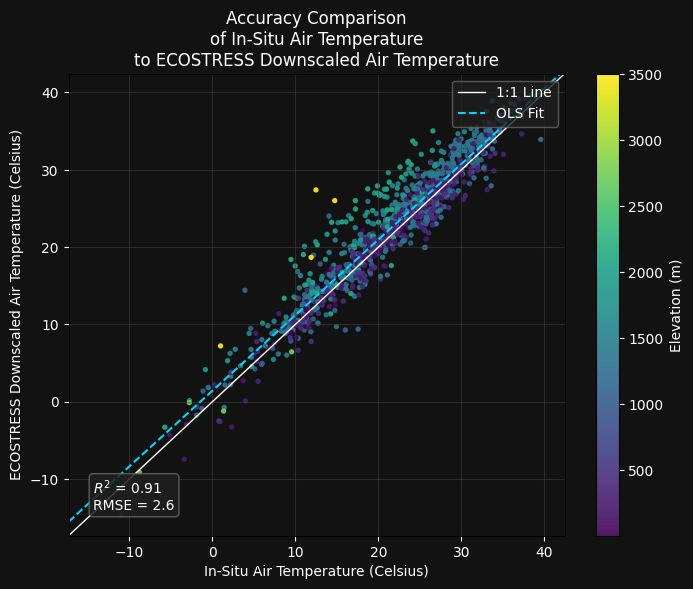

In [7]:
model_name = "JET"
x_variable = "insitu_Ta_C"
y_variable = "Ta_C"
color_variable = "elevation_m"

# Filter out rows with NaN values in either variable
valid_data = df[[x_variable, y_variable, color_variable]].dropna()

# Dark mode styling
fig, ax = plt.subplots(figsize=(8, 6), facecolor="#121212")
ax.set_facecolor("#121212")

sc = ax.scatter(
    x=valid_data[x_variable],
    y=valid_data[y_variable],
    c=valid_data[color_variable],
    cmap="viridis",
    color=None,
    s=8,
    alpha=0.9
)

# Use a common axis range so reference lines span the full displayed axes
xlim = ax.get_xlim()
ylim = ax.get_ylim()
axis_min = min(xlim[0], ylim[0])
axis_max = max(xlim[1], ylim[1])
ax.set_xlim(axis_min, axis_max)
ax.set_ylim(axis_min, axis_max)

# Add 1-to-1 line spanning full axis range
ax.plot([axis_min, axis_max], [axis_min, axis_max], color='white', linestyle='-', linewidth=1, label='1:1 Line')

# Add OLS regression line spanning full x-axis range
coefs = np.polyfit(valid_data[x_variable], valid_data[y_variable], 1)
ols_x = np.array([axis_min, axis_max])
ols_y = coefs[0] * ols_x + coefs[1]
ax.plot(ols_x, ols_y, color='#00d4ff', linestyle='--', linewidth=1.5, label='OLS Fit')

# Calculate R-squared and RMSE
from sklearn.metrics import r2_score, mean_squared_error
y_true = valid_data[y_variable]
y_pred = coefs[0] * valid_data[x_variable] + coefs[1]
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Annotate R-squared and RMSE on plot in lower left corner
ax.annotate(f"$R^2$ = {r2:.2f}\nRMSE = {rmse:.1f}",
            xy=(0.05, 0.05), xycoords='axes fraction',
            ha='left', va='bottom',
            fontsize=10, color='white',
            bbox=dict(boxstyle='round', fc='#1f1f1f', ec='#666666', alpha=0.85))

ax.grid(True, zorder=0, color='#444444', alpha=0.5)
ax.set_xlabel(f"In-Situ Air Temperature (Celsius)", color='white')
ax.set_ylabel(f"ECOSTRESS Downscaled Air Temperature (Celsius)", color='white')
ax.set_title(
    f"Accuracy Comparison\nof In-Situ Air Temperature\nto ECOSTRESS Downscaled Air Temperature",
    color='white'
)

# Improve tick visibility on dark background
ax.tick_params(colors='white')

cbar = plt.colorbar(sc, ax=ax, label="Elevation (m)")
cbar.ax.yaxis.label.set_color('white')
cbar.ax.tick_params(colors='white')

legend = ax.legend(loc='upper right', facecolor='#1f1f1f', edgecolor='#666666')
for text in legend.get_texts():
    text.set_color('white')

plt.show()

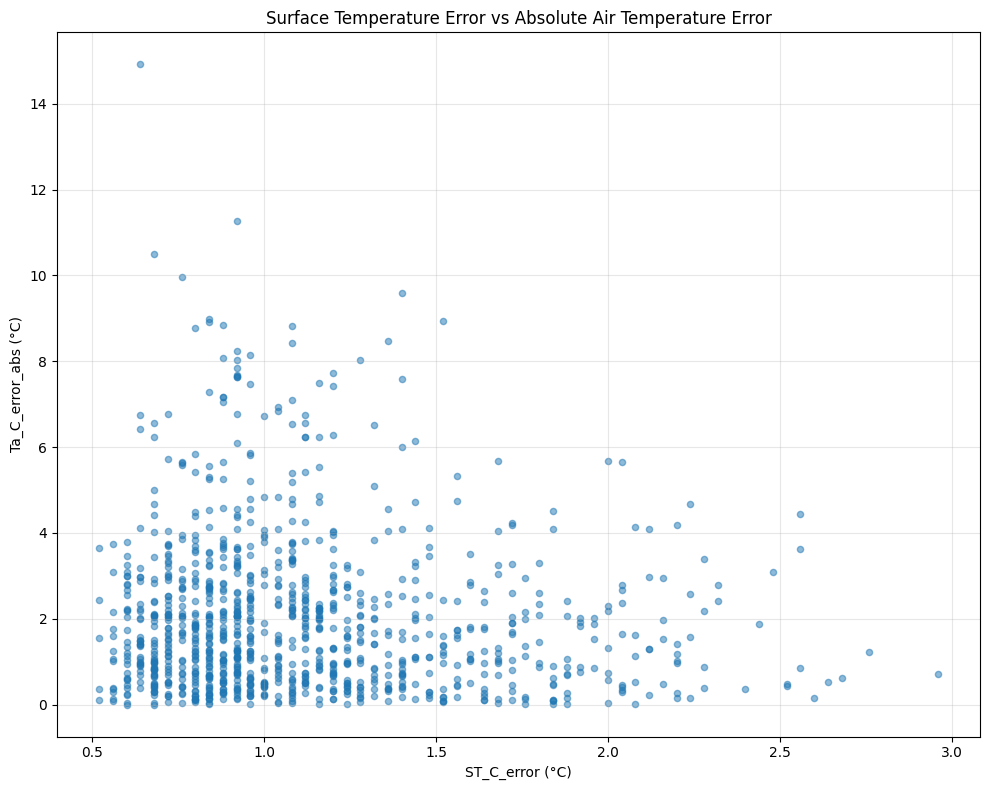

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(df['ST_C_error'], df['Ta_C_error_abs'], alpha=0.5, s=20)
plt.xlabel('ST_C_error (°C)')
plt.ylabel('Ta_C_error_abs (°C)')
plt.title('Surface Temperature Error vs Absolute Air Temperature Error')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

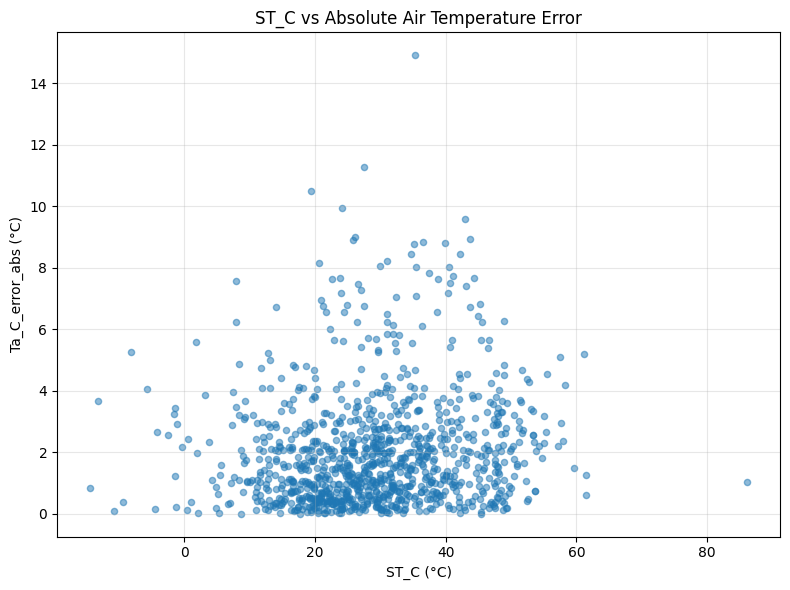

In [9]:
# Scatter plot: ST_C vs Ta_C_error_abs
plot_data = df[["ST_C", "Ta_C_error_abs"]].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(plot_data["ST_C"], plot_data["Ta_C_error_abs"], alpha=0.5, s=20)
plt.xlabel("ST_C (°C)")
plt.ylabel("Ta_C_error_abs (°C)")
plt.title("ST_C vs Absolute Air Temperature Error")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

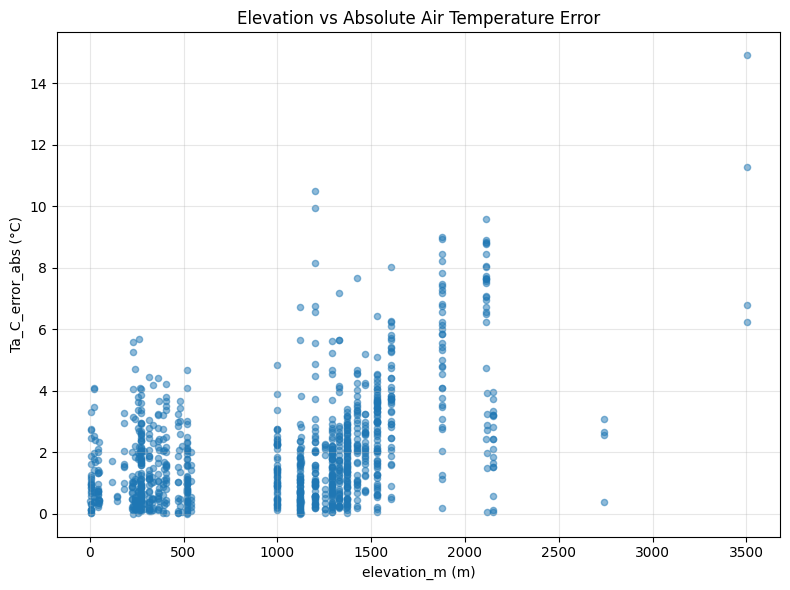

In [10]:
plot_data = df[["elevation_m", "Ta_C_error_abs"]].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(plot_data["elevation_m"], plot_data["Ta_C_error_abs"], alpha=0.5, s=20)
plt.xlabel("elevation_m (m)")
plt.ylabel("Ta_C_error_abs (°C)")
plt.title("Elevation vs Absolute Air Temperature Error")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

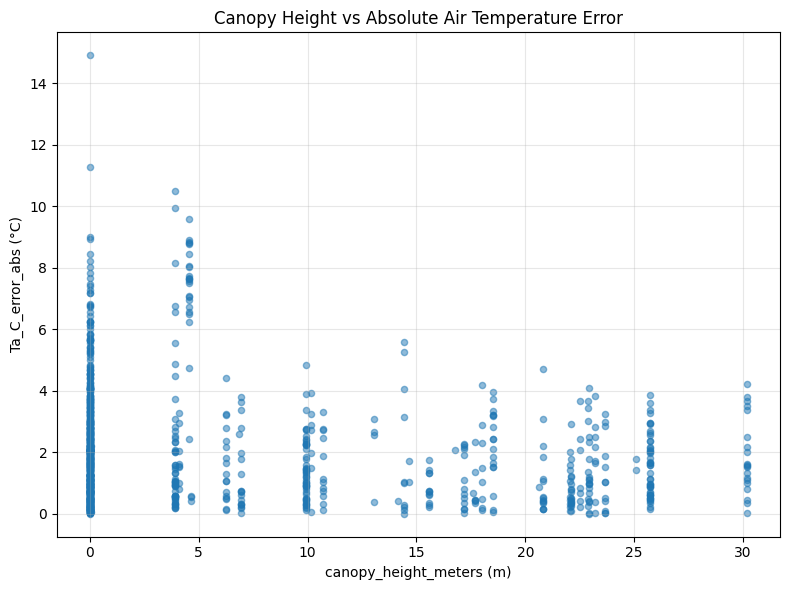

In [11]:
plot_data = df[["canopy_height_meters", "Ta_C_error_abs"]].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(plot_data["canopy_height_meters"], plot_data["Ta_C_error_abs"], alpha=0.5, s=20)
plt.xlabel("canopy_height_meters (m)")
plt.ylabel("Ta_C_error_abs (°C)")
plt.title("Canopy Height vs Absolute Air Temperature Error")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

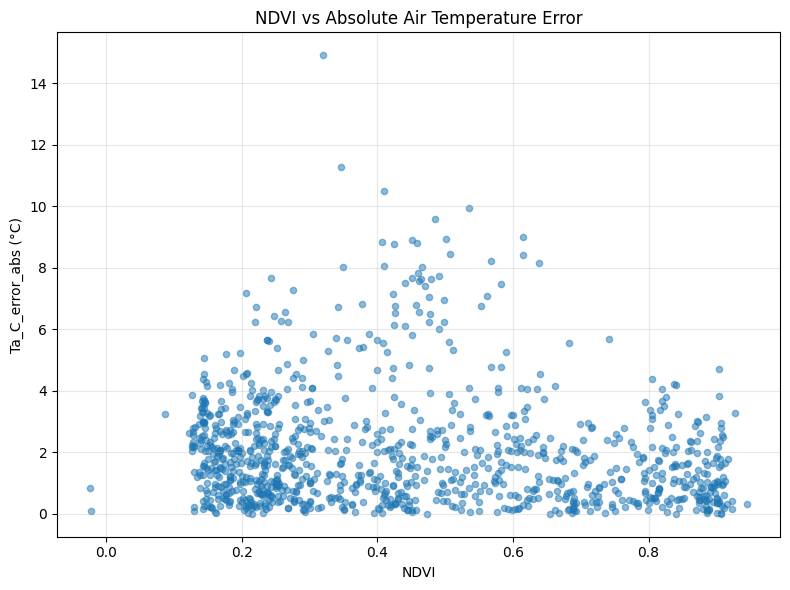

In [12]:
plot_data = df[["NDVI", "Ta_C_error_abs"]].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(plot_data["NDVI"], plot_data["Ta_C_error_abs"], alpha=0.5, s=20)
plt.xlabel("NDVI")
plt.ylabel("Ta_C_error_abs (°C)")
plt.title("NDVI vs Absolute Air Temperature Error")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
# Correlations for INPUT_VARIABLES with Ta_C_error
vars_in_df = [v for v in INPUT_VARIABLES if v in df.columns]
numeric_vars = df[vars_in_df].select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlations and keep only finite values (no NaN, no inf)
corrs = df[numeric_vars].corrwith(df["Ta_C_error_abs"])
input_var_corrs = (
    corrs[np.isfinite(corrs)]
    .sort_values(ascending=False)
    .rename("correlation")
    .to_frame()
)

input_var_corrs

,correlation
elevation_m,0.455880
ST_C,0.120812
wind_speed_mps,-0.014729
emissivity,-0.019856
albedo,-0.058426
ST_C_error,-0.083808
NDVI,-0.133120
SZA_deg,-0.134871
canopy_height_meters,-0.152562


In [14]:
from scipy.stats import pearsonr
import pandas as pd

# Correlation statistics for INPUT_VARIABLES with Ta_C_error_abs
target_col = "Ta_C_error_abs"
vars_in_df = [v for v in INPUT_VARIABLES if v in df.columns]
numeric_vars = df[vars_in_df].select_dtypes(include=[np.number]).columns.tolist()

rows = []
for var in numeric_vars:
    pair = df[[var, target_col]].dropna()
    if len(pair) < 3:
        continue

    r, p = pearsonr(pair[var], pair[target_col])
    if not (np.isfinite(r) and np.isfinite(p)):
        continue

    rows.append({
        "variable": var,
        "correlation": r,
        "r_square": r**2,
        "p_value": p,
        "n": len(pair),
    })

input_var_stats = (
    pd.DataFrame(rows)
    .sort_values(by="correlation", key=lambda s: s.abs(), ascending=False)
    .set_index("variable")
)

input_var_stats

,correlation,r_square,p_value,n
variable,,,,
elevation_m,0.455880,0.207827,6.526102e-55,1048
canopy_height_meters,-0.152562,0.023275,6.975939e-07,1048
SZA_deg,-0.134871,0.018190,1.181405e-05,1048
NDVI,-0.133120,0.017721,1.535042e-05,1048
ST_C,0.120812,0.014595,8.828774e-05,1048
ST_C_error,-0.083808,0.007024,6.634829e-03,1048
albedo,-0.058426,0.003414,5.865346e-02,1048
emissivity,-0.019856,0.000394,5.208126e-01,1048
wind_speed_mps,-0.014729,0.000217,6.342086e-01,1046


Stored 2 positive correlations in 'top_positive_correlations'
Stored 7 negative correlations in 'top_negative_correlations'

TOP 9 STRONGEST CORRELATIONS WITH Ta_C_error
(Selected independent variables only, real values only)

Positive Correlations:
elevation_m    0.455880
ST_C           0.120812
Name: correlation, dtype: float64

------------------------------------------------------------

Negative Correlations:
canopy_height_meters   -0.152562
SZA_deg                -0.134871
NDVI                   -0.133120
ST_C_error             -0.083808
albedo                 -0.058426
emissivity             -0.019856
wind_speed_mps         -0.014729
Name: correlation, dtype: float64


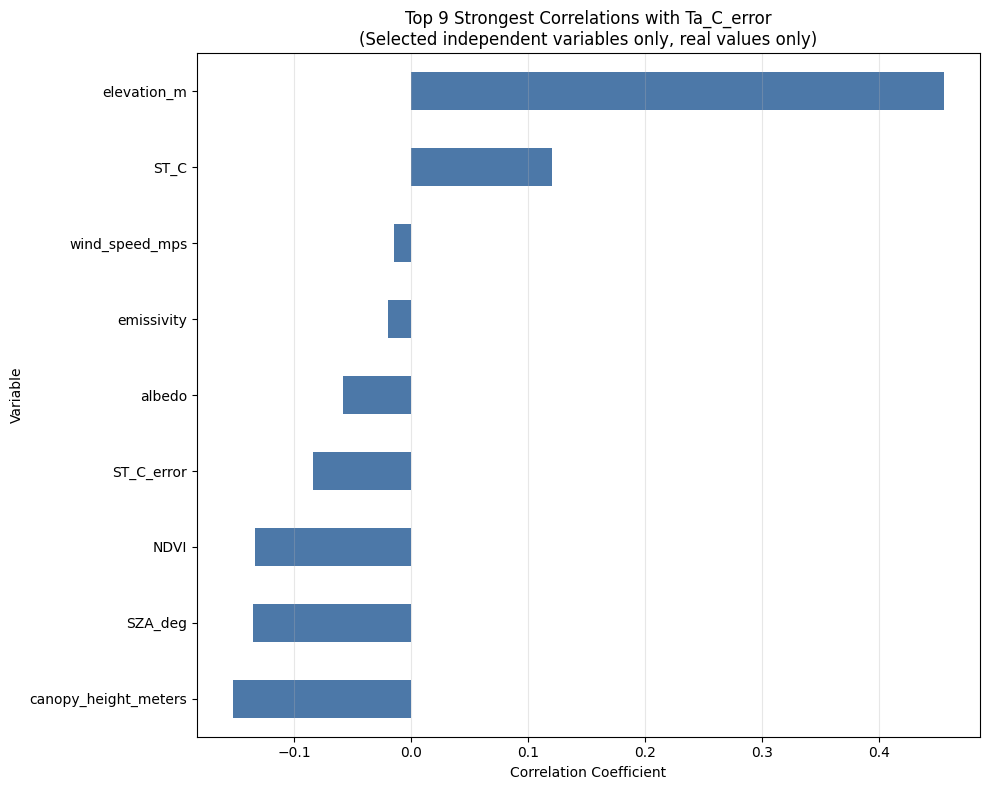

In [15]:
# Discover strongest correlations with Ta_C_error among selected independent variables
import seaborn as sns
import pandas as pd

# Use input_var_corrs which already has only selected variables with real correlation values
correlations = input_var_corrs['correlation']

top_n = min(20, len(correlations))  # avoid overlap/duplication when variable count is small

# Select strongest variables by absolute correlation
top_correlations = correlations.reindex(correlations.abs().sort_values(ascending=False).index).head(top_n)
top_positive_correlations = top_correlations[top_correlations > 0]
top_negative_correlations = top_correlations[top_correlations < 0]

print(f"Stored {len(top_positive_correlations)} positive correlations in 'top_positive_correlations'")
print(f"Stored {len(top_negative_correlations)} negative correlations in 'top_negative_correlations'")
print()

# Display top correlations
print("=" * 60)
print(f"TOP {top_n} STRONGEST CORRELATIONS WITH Ta_C_error")
print("(Selected independent variables only, real values only)")
print("=" * 60)
print(f"\nPositive Correlations:")
print(top_positive_correlations)
print("\n" + "-" * 60)
print(f"\nNegative Correlations:")
print(top_negative_correlations)

# Visualize top correlations
fig, ax = plt.subplots(figsize=(10, 8))
bar_color = "#4c78a8"
top_correlations.sort_values().plot(kind='barh', ax=ax, color=bar_color)
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Variable')
ax.set_title(f'Top {top_n} Strongest Correlations with Ta_C_error\n(Selected independent variables only, real values only)')
ax.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import statsmodels.api as sm

# Use the selected strongest variables
top_corr_vars = top_correlations.index.tolist()

# Prepare data: remove rows with NaN in any selected variable or Ta_C_error
X = df[top_corr_vars].dropna()
y = df.loc[X.index, "Ta_C_error"].dropna()

# Ensure X and y have the same index
common_idx = X.index.intersection(y.index)
X = X.loc[common_idx]
y = y.loc[common_idx]

# Fit OLS regression (scikit-learn for predictions/metrics)
ols_model = LinearRegression()
ols_model.fit(X, y)

# Fit OLS regression (statsmodels for p-values)
X_sm = sm.add_constant(X, has_constant="add")
ols_inference = sm.OLS(y, X_sm).fit()

# Get coefficients with p-values
coef_df = pd.DataFrame({
    'Variable': top_corr_vars,
    'Coefficient': ols_model.coef_,
    'p_value': ols_inference.pvalues.reindex(top_corr_vars).values
}).sort_values('Coefficient', ascending=False)

print("=" * 60)
print("OLS REGRESSION COEFFICIENTS FOR Ta_C_error")
print("=" * 60)
print(coef_df.to_string(index=False, float_format=lambda v: f"{v:.6f}"))
print(f"\nIntercept: {ols_model.intercept_:.6f}")
print(f"Intercept p-value: {ols_inference.pvalues.get('const', float('nan')):.6f}")

# Generate predictions
y_pred_ols = ols_model.predict(X)

# Calculate metrics
r2_ols = r2_score(y, y_pred_ols)
rmse_ols = np.sqrt(mean_squared_error(y, y_pred_ols))

print(f"\nModel Performance:")
print(f"R² = {r2_ols:.4f}")
print(f"RMSE = {rmse_ols:.4f}")

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y, y_pred_ols, alpha=0.5, s=20)

# Add 1:1 line
min_lim = min(y.min(), y_pred_ols.min())
max_lim = max(y.max(), y_pred_ols.max())
plt.plot([min_lim, max_lim], [min_lim, max_lim], 'k--', linewidth=1, label='1:1 Line')

plt.xlabel('Observed Ta_C_error (°C)')
plt.ylabel('Predicted Ta_C_error (°C)')
plt.title(f'OLS Model: Predicted vs Observed Ta_C_error\nR² = {r2_ols:.4f}, RMSE = {rmse_ols:.4f}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

# Use existing feature matrix/target and keep aligned rows
common_idx = X.index.intersection(y.index)
X_reg = X.loc[common_idx]
y_reg = y.loc[common_idx]

# OLS with statistical inference (p-values, CIs)
X_sm = sm.add_constant(X_reg, has_constant="add")
ols_inference = sm.OLS(y_reg, X_sm).fit()

print(f"R²: {ols_inference.rsquared:.4f}")
print(f"Adjusted R²: {ols_inference.rsquared_adj:.4f}\n")

coef_table = ols_inference.summary2().tables[1].copy()
coef_table = coef_table.rename(
    columns={
        "Coef.": "coef",
        "Std.Err.": "std_err",
        "P>|t|": "p_value",
        "[0.025": "ci_lower",
        "0.975]": "ci_upper",
    }
)
coef_table["significant_0.05"] = coef_table["p_value"] < 0.05

predictor_table = coef_table.drop(index="const", errors="ignore").sort_values("p_value")
print("Predictor significance (sorted by p-value):")
print(
    predictor_table[
        ["coef", "std_err", "t", "p_value", "ci_lower", "ci_upper", "significant_0.05"]
    ].to_string(float_format=lambda v: f"{v:.4f}")
)

sig = predictor_table[predictor_table["significant_0.05"]]
print(f"\nSignificant predictors at α=0.05 ({len(sig)}): {sig.index.tolist()}")

# Optional: multicollinearity check (VIF)
vif_vals = []
for i, col in enumerate(X_reg.columns):
    vif_vals.append((col, variance_inflation_factor(X_reg.values, i)))

vif_vals = sorted(vif_vals, key=lambda x: x[1], reverse=True)
print("\nVIF (higher means more multicollinearity):")
for col, vif in vif_vals:
    print(f"{col:25s} {vif:.2f}")

In [ ]:
import pandas as pd

# Define selection criteria
p_value_threshold = 0.05
vif_threshold = 10.0
correlation_threshold = 0.1

# Extract data from previous analyses
variable_analysis = pd.DataFrame({
    'correlation': input_var_corrs['correlation'],
    'abs_correlation': input_var_corrs['correlation'].abs(),
    'p_value': predictor_table['p_value'],
    'vif': [v[1] for v in vif_vals],
    'coefficient': predictor_table['coef']
}, index=[v[0] for v in vif_vals])

# Apply selection criteria
variable_analysis['significant_p'] = variable_analysis['p_value'] < p_value_threshold
variable_analysis['low_vif'] = variable_analysis['vif'] < vif_threshold
variable_analysis['strong_correlation'] = variable_analysis['abs_correlation'] > correlation_threshold

# Select variables meeting ALL criteria
variable_analysis['selected'] = (
    variable_analysis['significant_p'] & 
    variable_analysis['low_vif'] & 
    variable_analysis['strong_correlation']
)

# Sort by absolute correlation (strength of relationship)
variable_analysis_sorted = variable_analysis.sort_values('abs_correlation', ascending=False)

print("=" * 80)
print("VARIABLE SELECTION SUMMARY")
print("=" * 80)
print(f"\nSelection Criteria:")
print(f"  • P-value < {p_value_threshold}")
print(f"  • VIF < {vif_threshold}")
print(f"  • |Correlation| > {correlation_threshold}")
print(f"\nAll Variables Analysis:")
print(variable_analysis_sorted.to_string(float_format=lambda x: f'{x:.4f}'))

# Extract selected variables
selected_variables = variable_analysis_sorted[variable_analysis_sorted['selected']].index.tolist()
rejected_variables = variable_analysis_sorted[~variable_analysis_sorted['selected']].index.tolist()

print(f"\n" + "=" * 80)
print(f"SELECTED VARIABLES ({len(selected_variables)}):")
print("=" * 80)
for var in selected_variables:
    row = variable_analysis_sorted.loc[var]
    print(f"  ✓ {var:25s} | r={row['correlation']:6.3f} | p={row['p_value']:.4f} | VIF={row['vif']:5.2f}")

print(f"\n" + "=" * 80)
print(f"REJECTED VARIABLES ({len(rejected_variables)}):")
print("=" * 80)
for var in rejected_variables:
    row = variable_analysis_sorted.loc[var]
    reasons = []
    if row['p_value'] >= p_value_threshold:
        reasons.append(f"p={row['p_value']:.4f}")
    if row['vif'] >= vif_threshold:
        reasons.append(f"VIF={row['vif']:.1f}")
    if row['abs_correlation'] <= correlation_threshold:
        reasons.append(f"|r|={row['abs_correlation']:.3f}")
    print(f"  ✗ {var:25s} | {', '.join(reasons)}")

# Store for use in subsequent analyses
print(f"\nStored in variable: selected_variables")

In [ ]:
# Display final selected variables summary
print(f"\n{'='*80}")
print("FINAL SELECTED VARIABLES FOR Ta_C_error MODELING")
print(f"{'='*80}")
print(f"\nBased on:")
print(f"  • Statistical significance (p < 0.05)")
print(f"  • Low multicollinearity (VIF < 10)")
print(f"  • Strong correlation (|r| > 0.1)")
print(f"\nSelected {len(selected_variables)} variables:\n")
for i, var in enumerate(selected_variables, 1):
    row = variable_analysis_sorted.loc[var]
    print(f"{i}. {var:25s} r={row['correlation']:7.3f}  p={row['p_value']:.4f}  VIF={row['vif']:5.2f}")
print(f"\n{'='*80}")

In [ ]:
# Compare selection with and without VIF constraint
import pandas as pd

# Selection WITHOUT VIF constraint (only p-value and correlation)
selected_without_vif = variable_analysis_sorted[
    (variable_analysis_sorted['significant_p']) & 
    (variable_analysis_sorted['strong_correlation'])
].index.tolist()

# Selection WITH VIF constraint (p-value, correlation, AND VIF < 10)
selected_with_vif = selected_variables

# Identify which variables are removed when considering VIF
removed_by_vif = [v for v in selected_without_vif if v not in selected_with_vif]

print("=" * 80)
print("COMPARISON: SIGNIFICANT VARIABLES WITH vs WITHOUT VIF CONSTRAINT")
print("=" * 80)

print(f"\n① WITHOUT VIF Constraint (p < 0.05 AND |r| > 0.1)")
print(f"  {len(selected_without_vif)} variables selected:\n")
for i, var in enumerate(selected_without_vif, 1):
    row = variable_analysis_sorted.loc[var]
    vif_flag = '  ⚠️ HIGH VIF' if row['vif'] >= vif_threshold else ''
    print(f"  {i}. {var:25s} r={row['correlation']:7.3f}  p={row['p_value']:.4f}  VIF={row['vif']:6.2f}{vif_flag}")

print(f"\n\n② WITH VIF Constraint (p < 0.05 AND |r| > 0.1 AND VIF < 10)")
print(f"  {len(selected_with_vif)} variables selected:\n")
for i, var in enumerate(selected_with_vif, 1):
    row = variable_analysis_sorted.loc[var]
    print(f"  {i}. {var:25s} r={row['correlation']:7.3f}  p={row['p_value']:.4f}  VIF={row['vif']:6.2f}")

print(f"\n\n⚠ REMOVED due to high VIF (multicollinearity):")
print(f"  {len(removed_by_vif)} variables removed:\n")
if removed_by_vif:
    for i, var in enumerate(removed_by_vif, 1):
        row = variable_analysis_sorted.loc[var]
        print(f"  {i}. {var:25s} VIF={row['vif']:6.2f}  (r={row['correlation']:7.3f}, p={row['p_value']:.4f})")
else:
    print("  (none)")

print(f"\n{'='*80}")
print("\nKEY INSIGHT:")
if len(removed_by_vif) > 0:
    print(f"  • {len(removed_by_vif)} variables were statistically significant but had high VIF")
    print(f"  • High VIF means these variables are redundant (collinear with others)")
    print(f"  • Removing them creates a more robust, interpretable model")
    print(f"  • The {len(selected_with_vif)} remaining variables are independent predictors")
else:
    print(f"  • All statistically significant variables have acceptable VIF")
    print(f"  • No multicollinearity issues detected")
print(f"{'='*80}")

In [ ]:
# Visualize the comparison
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: All statistically significant variables (without VIF)
vars_without_vif = selected_without_vif
data_without_vif = variable_analysis_sorted.loc[vars_without_vif]

colors_without_vif = ['red' if vif >= vif_threshold else 'green' for vif in data_without_vif['vif']]
y_pos = np.arange(len(vars_without_vif))

ax1.barh(y_pos, data_without_vif['abs_correlation'], color=colors_without_vif, alpha=0.7)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(vars_without_vif)
ax1.set_xlabel('|Correlation with Ta_C_error|', fontsize=11)
ax1.set_title(f'① Without VIF Constraint\n{len(vars_without_vif)} Variables (p < 0.05, |r| > 0.1)', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.axvline(correlation_threshold, color='gray', linestyle='--', linewidth=1, label=f'|r| threshold = {correlation_threshold}')

# Add VIF values as text
for i, (var, row) in enumerate(data_without_vif.iterrows()):
    vif_text = f"VIF={row['vif']:.1f}"
    color = 'red' if row['vif'] >= vif_threshold else 'darkgreen'
    ax1.text(row['abs_correlation'] + 0.01, i, vif_text, va='center', color=color, fontweight='bold', fontsize=9)

ax1.legend(loc='lower right')

# Right plot: Variables passing VIF constraint
vars_with_vif = selected_with_vif
data_with_vif = variable_analysis_sorted.loc[vars_with_vif]

colors_with_vif = ['green'] * len(vars_with_vif)
y_pos2 = np.arange(len(vars_with_vif))

ax2.barh(y_pos2, data_with_vif['abs_correlation'], color=colors_with_vif, alpha=0.7)
ax2.set_yticks(y_pos2)
ax2.set_yticklabels(vars_with_vif)
ax2.set_xlabel('|Correlation with Ta_C_error|', fontsize=11)
ax2.set_title(f'② With VIF Constraint\n{len(vars_with_vif)} Variables (p < 0.05, |r| > 0.1, VIF < 10)', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.axvline(correlation_threshold, color='gray', linestyle='--', linewidth=1)

# Add VIF values as text
for i, (var, row) in enumerate(data_with_vif.iterrows()):
    vif_text = f"VIF={row['vif']:.1f}"
    ax2.text(row['abs_correlation'] + 0.01, i, vif_text, va='center', color='darkgreen', fontweight='bold', fontsize=9)

# Match x-axis limits
max_corr = max(data_without_vif['abs_correlation'].max(), data_with_vif['abs_correlation'].max())
ax1.set_xlim(0, max_corr * 1.15)
ax2.set_xlim(0, max_corr * 1.15)

plt.suptitle('Effect of VIF Constraint on Variable Selection', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print(f"\n\nLegend:")
print(f"  🟢 Green bars: VIF < 10 (acceptable multicollinearity)")
print(f"  🔴 Red bars: VIF ≥ 10 (high multicollinearity, excluded from final selection)")

In [ ]:
# Categorize variables as static vs dynamic
import pandas as pd
import numpy as np

# Define static vs dynamic variables
static_variables = ['elevation_m', 'canopy_height_meters', 'albedo']
dynamic_variables = ['ST_C', 'Ta_C', 'RH', 'SZA_deg', 'NDVI', 'emissivity', 'wind_speed_mps', 'soil_moisture']

# Get all significant variables (p < 0.05, |r| > 0.1)
significant_vars = selected_without_vif

# Categorize them
significant_static = [v for v in significant_vars if v in static_variables]
significant_dynamic = [v for v in significant_vars if v in dynamic_variables]

print("=" * 80)
print("VARIABLE CATEGORIZATION")
print("=" * 80)
print(f"\nStatistically Significant Variables (p < 0.05, |r| > 0.1): {len(significant_vars)}\n")

print(f"STATIC Variables ({len(significant_static)}):")
for var in significant_static:
    row = variable_analysis_sorted.loc[var]
    print(f"  • {var:25s} r={row['correlation']:7.3f}  VIF={row['vif']:6.2f}")

print(f"\nDYNAMIC Variables ({len(significant_dynamic)}):")
for var in significant_dynamic:
    row = variable_analysis_sorted.loc[var]
    print(f"  • {var:25s} r={row['correlation']:7.3f}  VIF={row['vif']:6.2f}")

print(f"\n{'='*80}")

In [ ]:
# Analyze correlation between variables to identify ST_C collinears
# Calculate correlation matrix for significant variables
corr_matrix = df[significant_vars].corr()

print("=" * 80)
print("CORRELATION MATRIX - Significant Variables")
print("=" * 80)
print("\nCorrelations with ST_C:")
st_c_corr = corr_matrix['ST_C'].sort_values(ascending=False)
print(st_c_corr.to_string(float_format=lambda x: f'{x:.3f}'))

print("\n" + "=" * 80)
print("HIGH CORRELATIONS WITH ST_C (|r| > 0.5):")
print("=" * 80)
high_corr_with_st = st_c_corr[st_c_corr.abs() > 0.5]
for var, corr_val in high_corr_with_st.items():
    if var != 'ST_C':
        vif_val = variable_analysis_sorted.loc[var, 'vif']
        print(f"  • {var:25s} correlation with ST_C = {corr_val:6.3f}, VIF = {vif_val:6.2f}")

print("\n" + "=" * 80)
print("\nFull correlation matrix:")
print(corr_matrix.to_string(float_format=lambda x: f'{x:.2f}'))

In [ ]:
# Strategy: Prioritize dynamic ST_C variable, exclude highly correlated variables
# Define correlation threshold for identifying collinears
collinearity_threshold = 0.5

# Start with all significant variables
selected_dynamic_priority = significant_vars.copy()

# Remove variables highly correlated with ST_C (except ST_C itself)
to_remove = []
for var in selected_dynamic_priority:
    if var != 'ST_C' and var in st_c_corr.index:
        if abs(st_c_corr[var]) > collinearity_threshold:
            to_remove.append(var)

selected_dynamic_priority = [v for v in selected_dynamic_priority if v not in to_remove]

print("=" * 80)
print("ALTERNATIVE SELECTION: PRIORITIZE DYNAMIC ST_C")
print("=" * 80)
print(f"\nStrategy: Keep ST_C, remove variables with |correlation| > {collinearity_threshold}")
print(f"\nRemoved due to high correlation with ST_C:")
for var in to_remove:
    corr_val = st_c_corr[var]
    vif_val = variable_analysis_sorted.loc[var, 'vif']
    print(f"  ✗ {var:25s} r(ST_C, {var}) = {corr_val:6.3f}, VIF = {vif_val:6.2f}")

print(f"\nFinal Selected Variables ({len(selected_dynamic_priority)}):")
for i, var in enumerate(selected_dynamic_priority, 1):
    row = variable_analysis_sorted.loc[var]
    var_type = 'DYNAMIC' if var in dynamic_variables else 'STATIC'
    print(f"  {i}. {var:25s} {var_type:8s} | r={row['correlation']:7.3f}  p={row['p_value']:.4f}  VIF={row['vif']:6.2f}")

print(f"\n{'='*80}")

In [ ]:
# Compare three approaches
print("=" * 80)
print("COMPARISON: THREE VARIABLE SELECTION STRATEGIES")
print("=" * 80)

# Strategy 1: VIF-based (low VIF only)
strategy1_vars = selected_with_vif
strategy1_name = "Strategy 1: VIF < 10"
strategy1_desc = "Only variables with low multicollinearity"

# Strategy 2: Dynamic-priority (keep ST_C, remove collinears)
strategy2_vars = selected_dynamic_priority
strategy2_name = "Strategy 2: Prioritize ST_C (dynamic)"
strategy2_desc = "Keep ST_C, exclude variables highly correlated with it"

# Strategy 3: All significant (no VIF filter)
strategy3_vars = selected_without_vif
strategy3_name = "Strategy 3: All significant (baseline)"
strategy3_desc = "All variables with p < 0.05 and |r| > 0.1"

print(f"\n① {strategy1_name}")
print(f"   {strategy1_desc}")
print(f"   Variables ({len(strategy1_vars)}): {', '.join(strategy1_vars)}")
print(f"   Dynamic: {sum(1 for v in strategy1_vars if v in dynamic_variables)}  Static: {sum(1 for v in strategy1_vars if v in static_variables)}")

print(f"\n② {strategy2_name}")
print(f"   {strategy2_desc}")
print(f"   Variables ({len(strategy2_vars)}): {', '.join(strategy2_vars)}")
print(f"   Dynamic: {sum(1 for v in strategy2_vars if v in dynamic_variables)}  Static: {sum(1 for v in strategy2_vars if v in static_variables)}")

print(f"\n③ {strategy3_name}")
print(f"   {strategy3_desc}")
print(f"   Variables ({len(strategy3_vars)}): {', '.join(strategy3_vars)}")
print(f"   Dynamic: {sum(1 for v in strategy3_vars if v in dynamic_variables)}  Static: {sum(1 for v in strategy3_vars if v in static_variables)}")

print(f"\n{'='*80}")
print("KEY DIFFERENCES:")
print("=" * 80)

print(f"\n• Strategy 1 (VIF < 10):")
print(f"  - Eliminates ALL high-VIF variables")
print(f"  - Result: Only 2 STATIC variables remain")
print(f"  - ⚠️  Issue: No dynamic observations for real-time modeling")

print(f"\n• Strategy 2 (Prioritize ST_C):")
print(f"  - Keeps the key DYNAMIC variable (ST_C)")
print(f"  - Removes only its strong collinears (Ta_C, SZA_deg)")
print(f"  - Result: 2 dynamic + 2 static variables")
print(f"  - ✓ Better for operational models that need current observations")

print(f"\n• Strategy 3 (No VIF filter):")
print(f"  - Includes all statistically significant variables")
print(f"  - ⚠️  Issue: High multicollinearity (VIF up to 50.7) causes instability")

print(f"\n{'='*80}")
print("RECOMMENDATION:")
print("=" * 80)
print(f"\nFor OPERATIONAL modeling: Use Strategy 2")
print(f"  ✓ Includes dynamic surface temperature observation (ST_C)")
print(f"  ✓ Includes humidity (RH) - another dynamic variable")
print(f"  ✓ Includes terrain context (elevation, canopy height)")
print(f"  ✓ Removes redundant collinear variables to improve model stability")
print(f"\nSelected variables: {', '.join(strategy2_vars)}")
print(f"\n{'='*80}")

In [ ]:
# Corrected variable selection: Exclude Ta_C (circular reasoning)
print("=" * 80)
print("CORRECTED VARIABLE SELECTION FOR UNCERTAINTY QUANTIFICATION")
print("=" * 80)

# Define variable categories
downscaling_inputs = ['ST_C', 'NDVI', 'albedo']  # Variables used to create Ta_C
excluded_circular = ['Ta_C']  # Must exclude - circular reasoning
independent_vars = ['RH', 'SZA_deg', 'elevation_m', 'canopy_height_meters', 
                   'emissivity', 'wind_speed_mps', 'soil_moisture']

print("\nVariable Categories:")
print(f"  • Downscaling inputs (used to create Ta_C): {', '.join(downscaling_inputs)}")
print(f"  • Excluded (circular): {', '.join(excluded_circular)}")
print(f"  • Independent variables: {', '.join(independent_vars)}")

# Remove Ta_C from significant variables
significant_vars_corrected = [v for v in selected_without_vif if v != 'Ta_C']

print(f"\n{'='*80}")
print(f"CORRECTED: Significant Variables (excluding Ta_C)")
print(f"{'='*80}")
print(f"\nOriginally had: {len(selected_without_vif)} variables")
print(f"After removing Ta_C: {len(significant_vars_corrected)} variables\n")

for i, var in enumerate(significant_vars_corrected, 1):
    row = variable_analysis_sorted.loc[var]
    if var in downscaling_inputs:
        category = 'DOWNSCALING INPUT'
    elif var in static_variables:
        category = 'STATIC'
    elif var in dynamic_variables:
        category = 'DYNAMIC'
    else:
        category = 'OTHER'
    print(f"  {i}. {var:25s} {category:20s} | r={row['correlation']:7.3f}  p={row['p_value']:.4f}  VIF={row['vif']:6.2f}")

print(f"\n{'='*80}")

In [ ]:
# Final selection: ST_C + low VIF supporting variables
print("=" * 80)
print("FINAL RECOMMENDATION: VARIABLES FOR Ta_C_error UQ MODEL")
print("=" * 80)

# Key insight: ST_C has high VIF because it's correlated with SZA_deg
# We need ST_C (the actual satellite observation) but can drop SZA_deg

# Recalculate without Ta_C in the correlation matrix
vars_no_ta = [v for v in significant_vars_corrected]
corr_matrix_corrected = df[vars_no_ta].corr()

print("\nCorrelations with ST_C (excluding Ta_C):")
st_c_corr_corrected = corr_matrix_corrected['ST_C'].sort_values(ascending=False)
print(st_c_corr_corrected.to_string(float_format=lambda x: f'{x:.3f}'))

# Apply strategy: Keep ST_C, remove high correlates
final_selected = []
for var in significant_vars_corrected:
    if var == 'ST_C':
        final_selected.append(var)  # Always keep ST_C
    elif var in st_c_corr_corrected.index:
        if abs(st_c_corr_corrected[var]) < 0.5:
            final_selected.append(var)  # Low correlation with ST_C
    else:
        final_selected.append(var)

print(f"\n{'='*80}")
print("FINAL SELECTED VARIABLES:")
print(f"{'='*80}\n")

for i, var in enumerate(final_selected, 1):
    row = variable_analysis_sorted.loc[var]
    if var in downscaling_inputs:
        category = 'DOWNSCALING INPUT'
        dynamic_flag = '🛰️'
    elif var in static_variables:
        category = 'STATIC'
        dynamic_flag = '📍'
    elif var in dynamic_variables:
        category = 'DYNAMIC'
        dynamic_flag = '🌡️'
    else:
        category = 'OTHER'
        dynamic_flag = '  '
    
    st_corr = st_c_corr_corrected[var] if var in st_c_corr_corrected.index else 0.0
    print(f"  {dynamic_flag} {i}. {var:25s} {category:20s} | r(error)={row['correlation']:6.3f}  r(ST_C)={st_corr:6.3f}  VIF={row['vif']:5.2f}")

print(f"\n{'='*80}")
print("RATIONALE:")
print(f"{'='*80}")
print(f"\n1. ST_C (Surface Temperature) - KEY SATELLITE OBSERVABLE")
print(f"   - Primary input to downscaling algorithm")
print(f"   - Essential for understanding error patterns")
print(f"   - Despite high VIF, it's the measurement we have")

print(f"\n2. Excluded SZA_deg due to:")
print(f"   - High correlation with ST_C (r = {st_c_corr_corrected['SZA_deg']:.3f})")
print(f"   - High VIF = 19.63 (multicollinearity)")
print(f"   - Solar angle varies predictably and is embedded in ST_C dynamics")

print(f"\n3. Excluded RH due to:")
print(f"   - High VIF = 25.20 (multicollinearity with other variables)")
print(f"   - Information may be partially captured in ST_C")

print(f"\n4. Kept elevation & canopy_height:")
print(f"   - Static terrain/vegetation context")
print(f"   - Low VIF (< 10)")
print(f"   - Independent of satellite observations")

print(f"\n{'='*80}")
print(f"FINAL SELECTION: {len(final_selected)} variables")
print(f"  {', '.join(final_selected)}")
print(f"{'='*80}")

In [ ]:
# Store final selection for downstream use
final_uq_variables = final_selected

print("\n" + "="*80)
print("VARIABLES STORED FOR UQ MODEL:")
print("="*80)
print(f"\nVariable name: final_uq_variables")
print(f"Variables ({len(final_uq_variables)}): {final_uq_variables}")
print("\n" + "="*80)

In [ ]:
# Final correction: Remove RH (also a downscaled product)
print("=" * 80)
print("FINAL CORRECTED SELECTION: Exclude Ta_C AND RH")
print("=" * 80)

# Update categories
downscaled_outputs = ['Ta_C', 'RH']  # Both are downscaled products
downscaling_inputs = ['ST_C', 'NDVI', 'albedo']  # Satellite observations used for downscaling
independent_static = ['elevation_m', 'canopy_height_meters']  # Terrain/vegetation
independent_dynamic = ['SZA_deg', 'emissivity', 'wind_speed_mps', 'soil_moisture']  # Other dynamic vars

print(f"\nVariable Categories:")
print(f"  • Downscaled OUTPUTS (exclude): {', '.join(downscaled_outputs)}")
print(f"  • Downscaling inputs: {', '.join(downscaling_inputs)}")
print(f"  • Independent static: {', '.join(independent_static)}")
print(f"  • Independent dynamic: {', '.join(independent_dynamic)}")

# Remove both Ta_C and RH from selection
final_uq_variables_corrected = [v for v in final_selected if v not in downscaled_outputs]

print(f"\n{'='*80}")
print(f"BEFORE: {len(final_selected)} variables")
print(f"  {final_selected}")
print(f"\nAFTER: {len(final_uq_variables_corrected)} variables")
print(f"  {final_uq_variables_corrected}")

print(f"\n{'='*80}")
print("FINAL UQ MODEL VARIABLES:")
print("=" * 80)
for i, var in enumerate(final_uq_variables_corrected, 1):
    row = variable_analysis_sorted.loc[var]
    if var in downscaling_inputs:
        category = 'SATELLITE INPUT'
        icon = '🛰️'
    elif var in independent_static:
        category = 'STATIC TERRAIN'
        icon = '📍'
    elif var in independent_dynamic:
        category = 'DYNAMIC'
        icon = '🌡️'
    else:
        category = 'OTHER'
        icon = '  '
    
    print(f"  {icon} {i}. {var:25s} {category:20s} | r(error)={row['correlation']:6.3f}  p={row['p_value']:.4f}  VIF={row['vif']:5.2f}")

print(f"\n{'='*80}")
print("FINAL RATIONALE:")
print("=" * 80)
print(f"\n✓ ST_C - Key satellite surface temperature observation (input to downscaling)")
print(f"✓ elevation_m - Static terrain context, independent of satellite obs")
print(f"✓ canopy_height_meters - Static vegetation context, independent of satellite obs")
print(f"\n✗ Ta_C - Excluded (downscaled OUTPUT being evaluated)")
print(f"✗ RH - Excluded (downscaled OUTPUT being evaluated)")
print(f"✗ SZA_deg - Excluded (high VIF=19.63, collinear with ST_C)")
print(f"\n{'='*80}")

# Update the stored variable
final_uq_variables = final_uq_variables_corrected
print(f"\nUpdated: final_uq_variables = {final_uq_variables}")
print(f"Count: {len(final_uq_variables)} variables")
print("=" * 80)

In [ ]:
# Complete correction: Exclude all downscaled products (Ta_C, RH, soil_moisture)
print("=" * 80)
print("COMPLETE CORRECTION: Exclude ALL Downscaled Products")
print("=" * 80)

# Updated comprehensive categories
downscaled_outputs = ['Ta_C', 'RH', 'soil_moisture']  # ALL downscaled products
downscaling_inputs = ['ST_C', 'NDVI', 'albedo']  # Satellite observations used for downscaling
independent_static = ['elevation_m', 'canopy_height_meters']  # Terrain/vegetation
independent_dynamic = ['SZA_deg', 'emissivity', 'wind_speed_mps']  # Other independent dynamic vars

print(f"\nComplete Variable Categories:")
print(f"  • Downscaled OUTPUTS (must exclude): {', '.join(downscaled_outputs)}")
print(f"  • Downscaling inputs (satellite obs): {', '.join(downscaling_inputs)}")
print(f"  • Independent static: {', '.join(independent_static)}")
print(f"  • Independent dynamic: {', '.join(independent_dynamic)}")

# Check if soil_moisture was in previous selection
print(f"\n{'='*80}")
print("Impact on Current Selection:")
print(f"{'='*80}")
print(f"\nCurrent final_uq_variables: {final_uq_variables}")

# Remove all downscaled outputs
final_uq_variables_complete = [v for v in final_uq_variables if v not in downscaled_outputs]

if final_uq_variables == final_uq_variables_complete:
    print(f"✓ No change needed - soil_moisture was already excluded")
    print(f"  (It was likely filtered out by VIF or correlation criteria)")
else:
    print(f"⚠ Updated selection after removing soil_moisture")
    print(f"  BEFORE: {final_uq_variables}")
    print(f"  AFTER:  {final_uq_variables_complete}")

print(f"\n{'='*80}")
print("FINAL UQ MODEL VARIABLES (Complete):")
print("=" * 80)
for i, var in enumerate(final_uq_variables_complete, 1):
    row = variable_analysis_sorted.loc[var]
    if var in downscaling_inputs:
        category = 'SATELLITE INPUT'
        icon = '🛰️'
    elif var in independent_static:
        category = 'STATIC TERRAIN'
        icon = '📍'
    elif var in independent_dynamic:
        category = 'INDEPENDENT DYNAMIC'
        icon = '🌡️'
    else:
        category = 'OTHER'
        icon = '  '
    
    print(f"  {icon} {i}. {var:25s} {category:20s} | r(error)={row['correlation']:6.3f}  p={row['p_value']:.4f}  VIF={row['vif']:5.2f}")

print(f"\n{'='*80}")
print("COMPLETE RATIONALE:")
print("=" * 80)
print(f"\n✓ INCLUDED (Independent predictors):")
print(f"  • ST_C - Satellite surface temperature (key input to downscaling)")
print(f"  • elevation_m - Static terrain context")
print(f"  • canopy_height_meters - Static vegetation context")

print(f"\n✗ EXCLUDED (Downscaled outputs - circular reasoning):")
print(f"  • Ta_C - Air temperature (the product being validated)")
print(f"  • RH - Relative humidity (downscaled product)")
print(f"  • soil_moisture - Soil moisture (downscaled product)")

print(f"\n✗ EXCLUDED (High multicollinearity with ST_C):")
print(f"  • SZA_deg - Solar zenith angle (VIF=19.63, r=0.644 with ST_C)")

print(f"\n{'='*80}")

# Update the stored variable
final_uq_variables = final_uq_variables_complete
print(f"\nFINAL: final_uq_variables = {final_uq_variables}")
print(f"Count: {len(final_uq_variables)} independent variables")
print("=" * 80)

## Additional Correction: Soil Moisture is Also Downscaled

**Update:** Soil moisture is also a downscaled product, not an independent observation.

**Comprehensive list of downscaled OUTPUTS:**
- Ta_C (air temperature)
- RH (relative humidity) 
- soil_moisture

These must all be excluded from UQ model predictors to avoid circular reasoning.

## Further Correction: RH is Also a Downscaled Product

**Critical Context:** RH (Relative Humidity) is also being downscaled using a similar approach to Ta_C. This means RH is also a **derived output** being evaluated, not an independent predictor.

**Implication:** RH must also be excluded from the UQ model to avoid circular reasoning.

**Updated categories:**
- **Downscaled OUTPUTS** (must exclude): Ta_C, RH
- **Satellite observations** (inputs to downscaling): ST_C, NDVI, albedo  
- **Independent variables**: elevation_m, canopy_height_meters, SZA_deg, emissivity, wind_speed_mps, soil_moisture

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Store all models and their results
models = {
    'OLS': ols_model,
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

# Train models and evaluate
results = {}
for name, model in models.items():
    if name == 'OLS':
        # Already trained
        y_pred = model.predict(X)
    else:
        model.fit(X, y)
        y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'r2': r2,
        'rmse': rmse
    }

    print(f"{name:20s} | R² = {r2:.4f} | RMSE = {rmse:.4f}")

print("\n" + "=" * 60)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 60)

# Sort by R² score
sorted_results = sorted(results.items(), key=lambda x: x[1]['r2'], reverse=True)
for i, (name, metrics) in enumerate(sorted_results, 1):
    r2 = metrics['r2']
    rmse = metrics['rmse']
    improvement = ((r2 - results['OLS']['r2']) / abs(results['OLS']['r2'])) * 100 if results['OLS']['r2'] != 0 else 0
    print(f"{i}. {name:20s} | R² = {r2:.4f} | RMSE = {rmse:.4f} | Improvement: {improvement:+.1f}%")

# Create comparison plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

for idx, (name, metrics) in enumerate(sorted_results):
    y_pred = metrics['y_pred']
    r2 = metrics['r2']
    rmse = metrics['rmse']

    ax = axes[idx]
    ax.scatter(y, y_pred, alpha=0.5, s=20)

    # Add 1:1 reference line
    min_lim = min(y.min(), y_pred.min())
    max_lim = max(y.max(), y_pred.max())
    ax.plot([min_lim, max_lim], [min_lim, max_lim], 'k--', linewidth=1, alpha=0.7)

    ax.set_xlabel('Observed Error (°C)')
    ax.set_ylabel('Predicted Error (°C)')
    ax.set_title(f'{name}\nR² = {r2:.4f}, RMSE = {rmse:.4f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBest performing model:", sorted_results[0][0],
      f"(R² = {sorted_results[0][1]['r2']:.4f})")

In [ ]:
df.SM